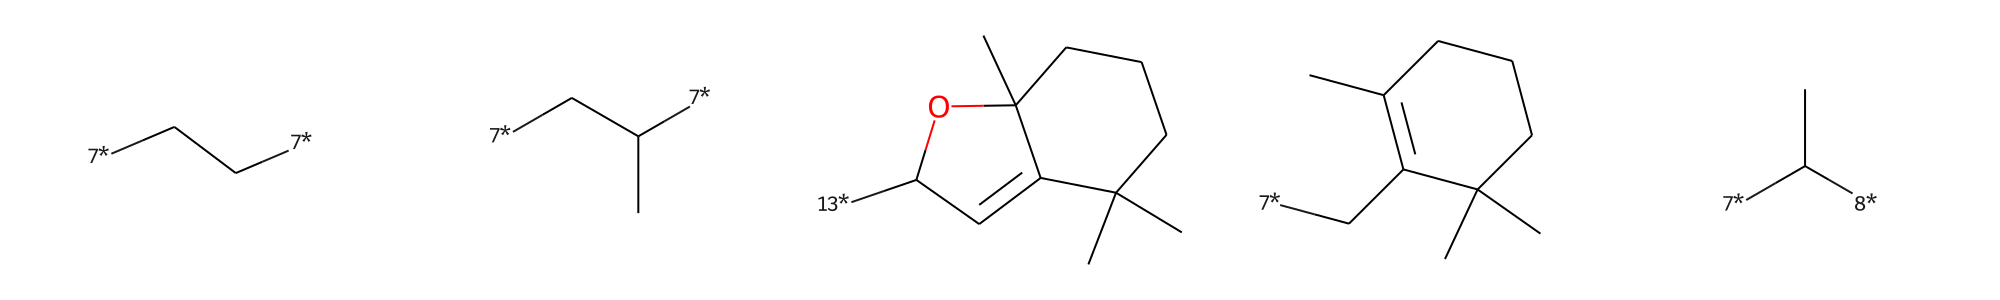

In [1]:
import pandas as pd
from rdkit.Chem import AllChem, BRICS, MolFromSmiles, Draw
from rdkit import Chem

mol = Chem.MolFromSmiles("C\C(\C=C\C=C(/C)\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C=C(\C)/C=C/C=C(\C)C1OC2(C)CCCC(C)(C)C2=C1")
AllChem.Compute2DCoords(mol)
decomposed = BRICS.BRICSDecompose(mol)
decomposed_mol = [MolFromSmiles(mol) for mol in decomposed]
Draw.MolsToGridImage(decomposed_mol,molsPerRow=5, subImgSize=(400,300))

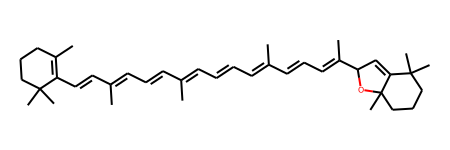

In [2]:
Chem.MolFromSmiles("C\C(\C=C\C=C(/C)\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C=C(\C)/C=C/C=C(\C)C1OC2(C)CCCC(C)(C)C2=C1")

  0%|          | 0/10 [00:00<?, ?it/s]

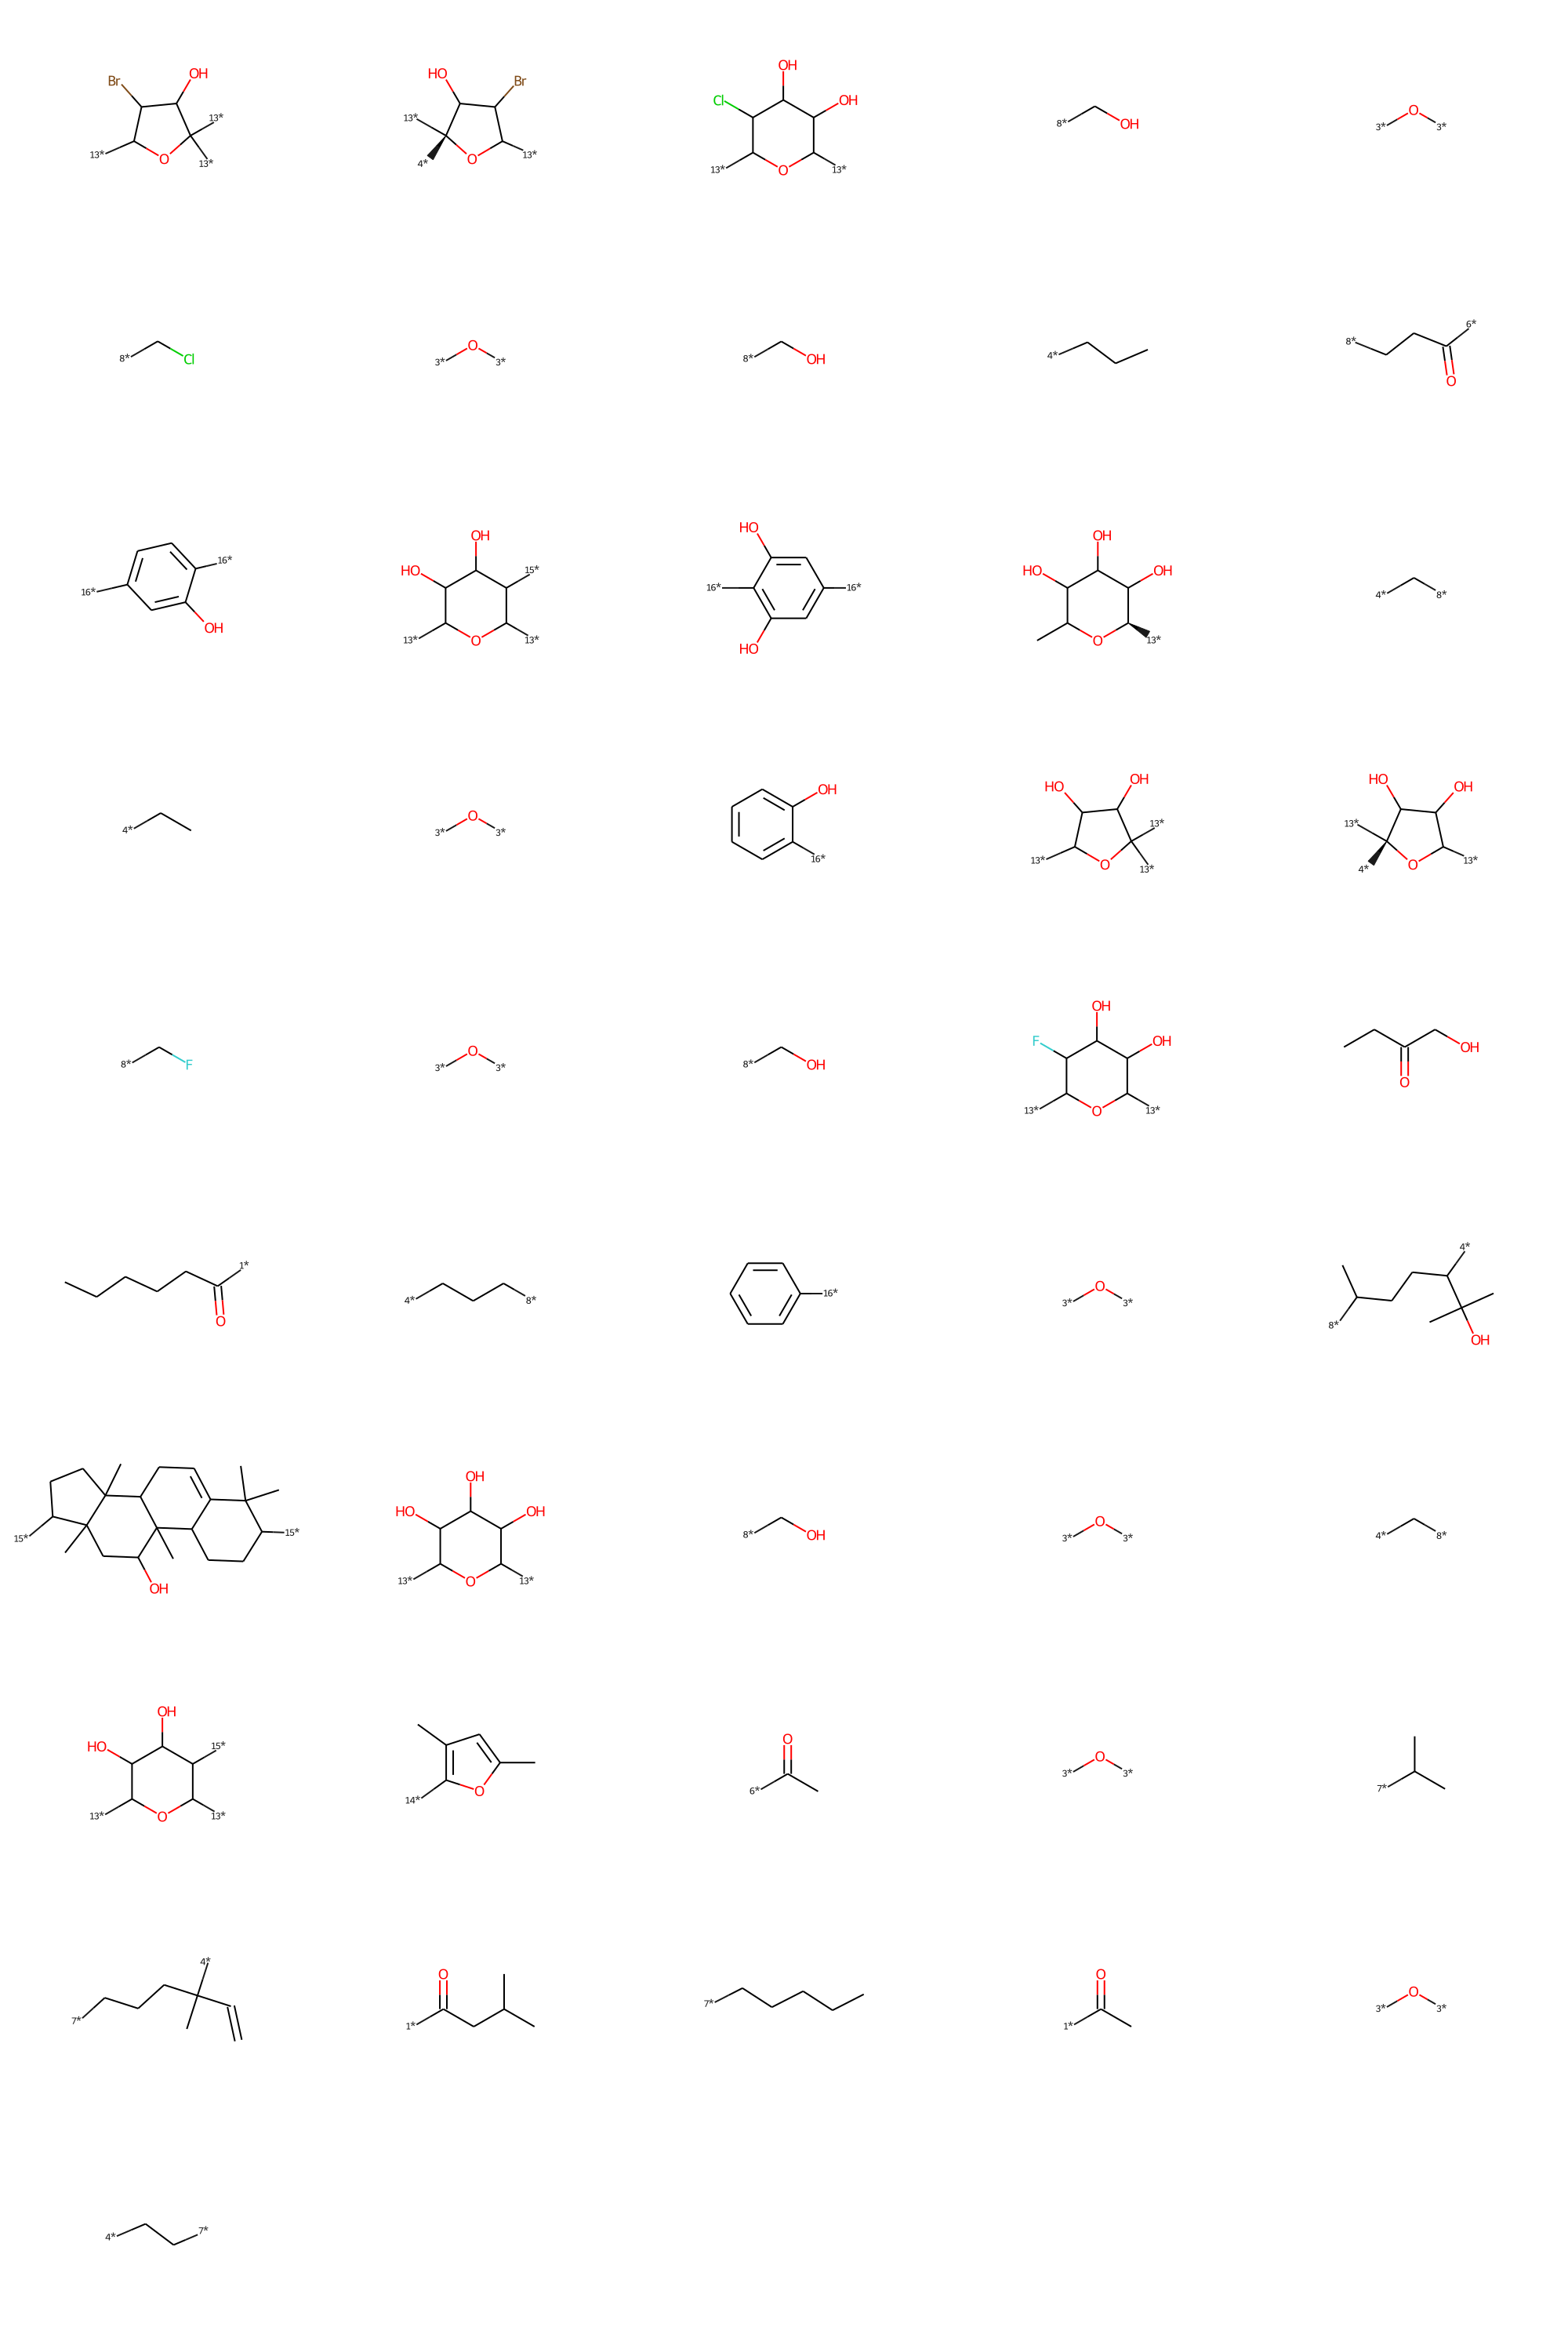

In [1]:
import pandas as pd
from rdkit.Chem import AllChem, BRICS, MolFromSmiles, Draw
from rdkit import Chem
from tqdm.notebook import tqdm

df = pd.read_csv("clean_train_dataset_undersampled.csv")
sweet_molecules = df[df["y"] == 1]
sweet_smiles = sweet_molecules["mols"].tolist()[1100:1110]

decomposed_mols = []
for sweet_smile in tqdm(sweet_smiles):
    mol = Chem.MolFromSmiles(sweet_smile)
    AllChem.Compute2DCoords(mol)
    decomposed = BRICS.BRICSDecompose(mol)
    decomposed_mol = [MolFromSmiles(mol) for mol in decomposed]
    decomposed_mols.extend(decomposed_mol)

Draw.MolsToGridImage(decomposed_mols,molsPerRow=5, subImgSize=(400,300))

In [42]:
#fragms = [Chem.MolFromSmiles(x) for x in sorted(decomposed_mols)]
ms = BRICS.BRICSBuild(decomposed_mols)

In [ ]:
molecules = list(ms)

In [33]:
len(molecules)

26491

/home/joao/anaconda3/envs/DeepSweet/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


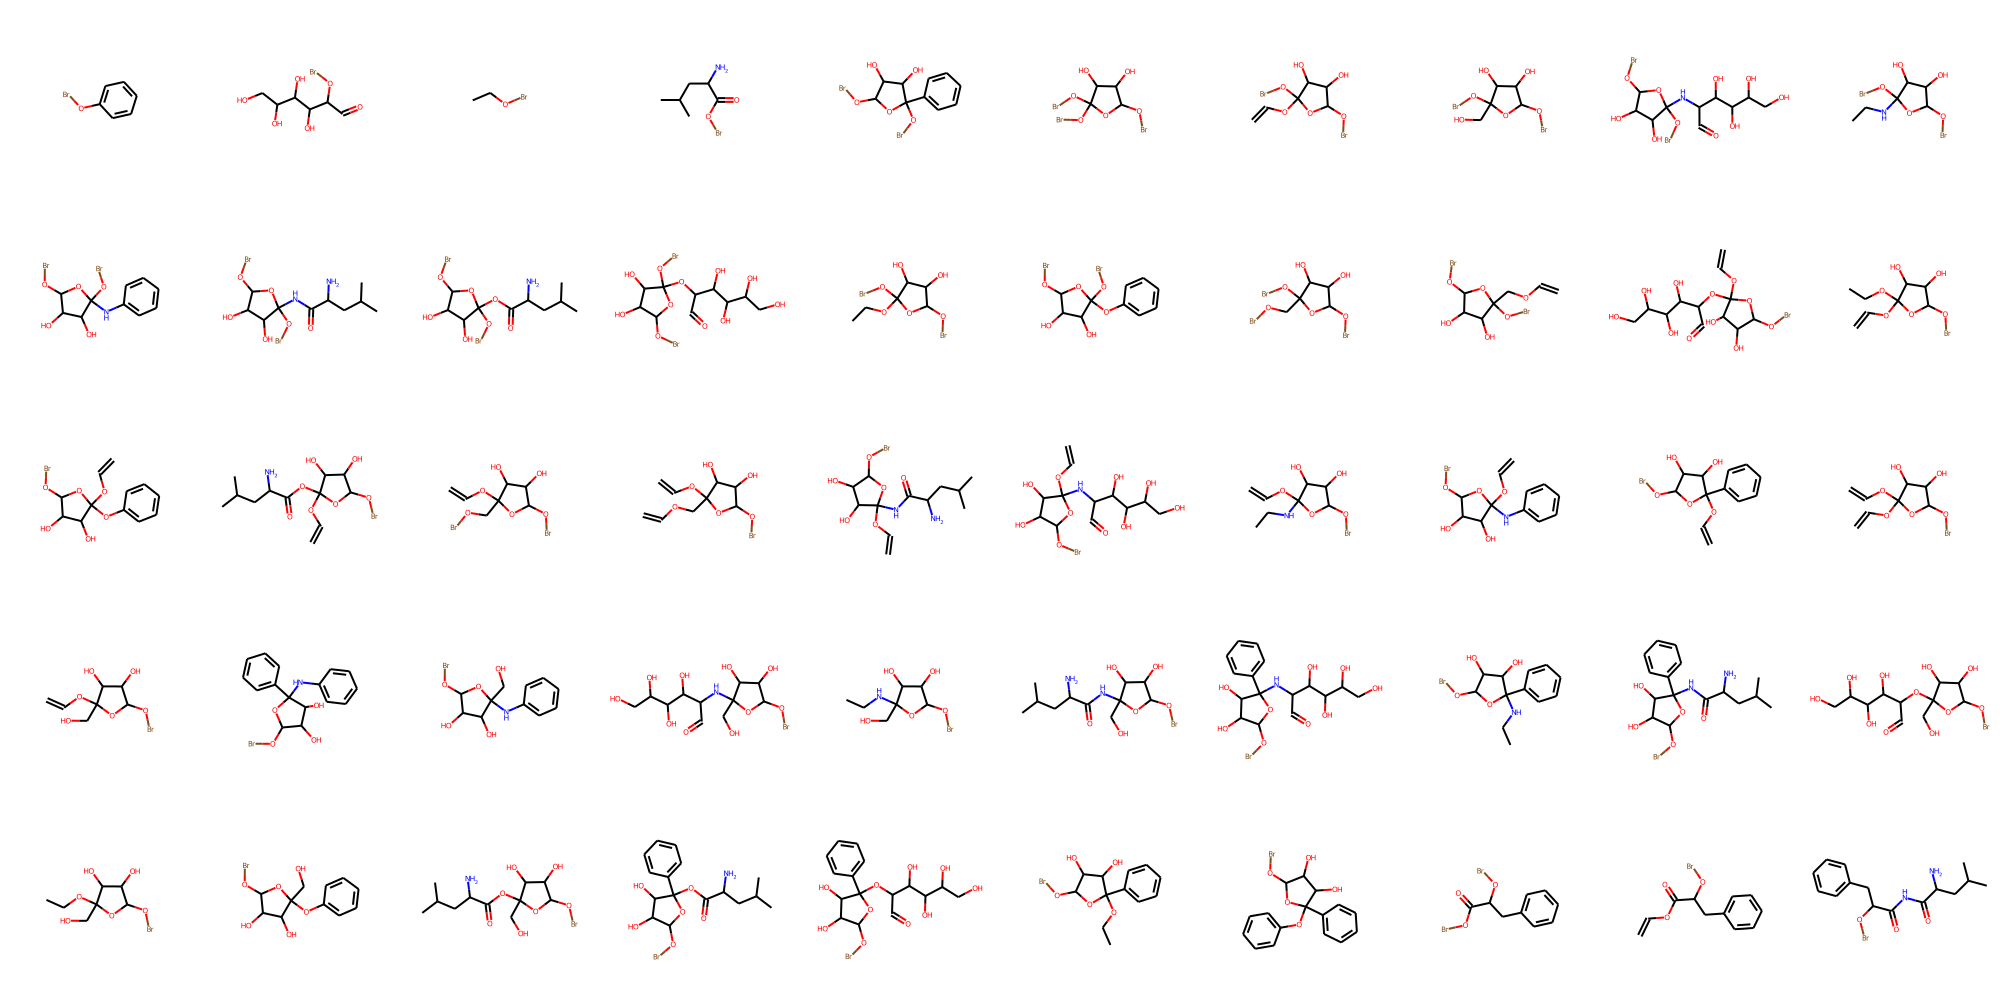

In [22]:
Draw.MolsToGridImage(molecules,molsPerRow=10)

In [34]:
from ensemble import Ensemble
from deepsweet_models import DeepSweetRF, DeepSweetDNN

models_folder_path = "/home/joao/Desktop/DeepSweet/resources/test_data/"

twod = DeepSweetRF(models_folder_path, "2d", "SelectFromModelFS")
dnn_rdk_boruta = DeepSweetDNN(models_folder_path, "rdk", "Boruta")
rdk = DeepSweetRF(models_folder_path, "rdk", "Boruta")
atompair = DeepSweetRF(models_folder_path, "atompair_fp", "SelectFromModelFS")
ecfp4 = DeepSweetDNN(models_folder_path, "ecfp4", "all")
ecfp8 = DeepSweetRF(models_folder_path, "ecfp8", "SelectFromModelFS")
ensemble = Ensemble([twod, rdk, dnn_rdk_boruta, atompair, ecfp8, ecfp4], models_folder_path)

In [35]:
from rdkit.Chem import MolToSmiles

predictions, dataset = ensemble.predict([MolToSmiles(x) for x in molecules])

Standardizing datapoint 0


[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Running Uncharger
[13:08:01] Run

Standardizing datapoint 1000


[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Running Uncharger
[13:08:03] Run

Standardizing datapoint 2000


[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Running Uncharger
[13:08:05] Run

Standardizing datapoint 3000


[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Running Uncharger
[13:08:06] Run

Standardizing datapoint 4000


[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Running Uncharger
[13:08:08] Run

Standardizing datapoint 5000


[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Running Uncharger
[13:08:10] Run

Standardizing datapoint 6000


[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Running Uncharger
[13:08:11] Run

Standardizing datapoint 7000


[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Running Uncharger
[13:08:12] Run

Standardizing datapoint 8000


[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Running Uncharger
[13:08:14] Run

Standardizing datapoint 9000


[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Running Uncharger
[13:08:16] Run

Standardizing datapoint 10000


[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Running Uncharger
[13:08:17] Run

Standardizing datapoint 11000


[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Running Uncharger
[13:08:19] Run

Standardizing datapoint 12000


[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Running Uncharger
[13:08:20] Run

Standardizing datapoint 13000


[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Running Uncharger
[13:08:22] Run

Standardizing datapoint 14000


[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Running Uncharger
[13:08:23] Run

Standardizing datapoint 15000


[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Running Uncharger
[13:08:25] Run

Standardizing datapoint 16000


[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Running Uncharger
[13:08:27] Run

Standardizing datapoint 17000


[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Running Uncharger
[13:08:29] Run

Standardizing datapoint 18000


[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Running Uncharger
[13:08:30] Run

Standardizing datapoint 19000


[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Running Uncharger
[13:08:32] Run

Standardizing datapoint 20000


[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Running Uncharger
[13:08:33] Run

Standardizing datapoint 21000


[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Running Uncharger
[13:08:35] Run

Standardizing datapoint 22000


[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Running Uncharger
[13:08:37] Run

Standardizing datapoint 23000


[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Running Uncharger
[13:08:38] Run

Standardizing datapoint 24000


[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Running Uncharger
[13:08:40] Run

Standardizing datapoint 25000


[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Running Uncharger
[13:08:41] Run

Standardizing datapoint 26000


[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Running Uncharger
[13:08:43] Run

Featurizing datapoint 0
Featurizing datapoint 1000
Featurizing datapoint 2000
Featurizing datapoint 3000
Featurizing datapoint 4000
Featurizing datapoint 5000
Featurizing datapoint 6000
Featurizing datapoint 7000
Featurizing datapoint 8000
Featurizing datapoint 9000
Featurizing datapoint 10000
Featurizing datapoint 11000
Featurizing datapoint 12000
Featurizing datapoint 13000
Featurizing datapoint 14000
Featurizing datapoint 15000
Featurizing datapoint 16000
Featurizing datapoint 17000
Featurizing datapoint 18000
Featurizing datapoint 19000
Featurizing datapoint 20000
Featurizing datapoint 21000
Featurizing datapoint 22000
Featurizing datapoint 23000
Featurizing datapoint 24000
Featurizing datapoint 25000
Featurizing datapoint 26000
Featurizing datapoint 0
Featurizing datapoint 1000
Featurizing datapoint 2000
Featurizing datapoint 3000
Featurizing datapoint 4000
Featurizing datapoint 5000
Featurizing datapoint 6000
Featurizing datapoint 7000
Featurizing datapoint 8000
Featurizing datap

2022-07-18 13:15:01.647339: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 48849404 exceeds 10% of free system memory.


Featurizing datapoint 0
Featurizing datapoint 1000
Featurizing datapoint 2000
Featurizing datapoint 3000
Featurizing datapoint 4000
Featurizing datapoint 5000
Featurizing datapoint 6000
Featurizing datapoint 7000
Featurizing datapoint 8000
Featurizing datapoint 9000
Featurizing datapoint 10000
Featurizing datapoint 11000
Featurizing datapoint 12000
Featurizing datapoint 13000
Featurizing datapoint 14000
Featurizing datapoint 15000
Featurizing datapoint 16000
Featurizing datapoint 17000
Featurizing datapoint 18000
Featurizing datapoint 19000
Featurizing datapoint 20000
Featurizing datapoint 21000
Featurizing datapoint 22000
Featurizing datapoint 23000
Featurizing datapoint 24000
Featurizing datapoint 25000
Featurizing datapoint 26000
Featurizing datapoint 0
Featurizing datapoint 1000
Featurizing datapoint 2000
Featurizing datapoint 3000
Featurizing datapoint 4000
Featurizing datapoint 5000
Featurizing datapoint 6000
Featurizing datapoint 7000
Featurizing datapoint 8000
Featurizing datap

In [39]:
for i, prediction in enumerate(predictions):
    if prediction > 0.8:
        print(dataset.mols[i])

NC(=O)CC(NC(=O)C(N)CC1=CC=CC=C1)C(=O)OCl
NC(=O)CC(NC(=O)C(N)CC1=CC=CC=C1)C(=O)OBr
C=COC(=O)C(CC(N)=O)NC(=O)C(N)CC1=CC=CC=C1
COC(=O)C(CC(N)=O)NC(=O)C(N)CC1=CC=CC=C1
C=COC(=O)C(CC(N)=O)NC(CC1=CC=CC=C1)C(=O)O
COC(=O)C(CC(N)=O)NC(CC1=CC=CC=C1)C(=O)O
CC(C)C(NC(=O)C(N)CC1=CC=CC=C1)C(=O)OCl
COC(=O)C(NC(=O)C(N)CC1=CC=CC=C1)C(C)C
C=COC(=O)C(NC(=O)C(N)CC1=CC=CC=C1)C(C)C
C=COC(=O)C(C)NC(=O)C(N)CC1=CC=CC=C1
COC(=O)C(C)NC(=O)C(N)CC1=CC=CC=C1
CC(C)CC(N)C(=O)NC(CC1=CC=CC=C1)C(=O)O
CC(C)CC(N)C(=O)NC(CC1=CC=CC=C1)C(=O)OBr
C=COC(=O)C(CC1=CC=CC=C1)NC(=O)C(N)CC(C)C
COC(=O)C(CC1=CC=CC=C1)NC(=O)C(N)CC(C)C
CC(C)CC(N)C(=O)NC(CC1=CC=CC=C1)C(=O)OCl
NC(=O)CCC(NC(=O)C(N)CC1=CC=CC=C1)C(=O)O
C=COC(=O)C(CC1=CC=CC=C1)NC(CCC(N)=O)C(=O)O
COC(=O)C(CC1=CC=CC=C1)NC(CCC(N)=O)C(=O)O
COC(CCCCN)C(=O)NC(CC1=CC=CC=C1)C(=O)O
C=COC(CCCCN)C(=O)NC(CC1=CC=CC=C1)C(=O)O
NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=CC=C1)C(=O)O
O=C(O)CC(OBr)C(=O)NC(CC1=CC=CC=C1)C(=O)O
C=COC(CC(=O)O)C(=O)NC(CC1=CC=CC=C1)C(=O)O
COC(CC(=O)O)C(=O)NC(CC1=CC=CC=C1)C(=O)O
